# **Exploratory Data Analysis (EDA)**

This is the step where I look at the data collected and make some analysis on it to better understand the data. This will be preformed using Python and various graphs

# General Outline of EDA

I plan to use the country of origin and launch rates to make meaningful charts to show how well a rocket will preform in the private space vs the public space in different countrys. I will also do some basic counts to show how many rockets have launched and how they did in flight.

# My steps
1.  Preview data
2.  Check total number of entries and column types
3.  Check any null values *none*
4.  Check duplicate entries *none*
5.  Plot distribution of numeric data (variate and pairwise joint distribution)
6.  Plot count distribution of categorical data
7.  Analise time series of numeric data

# Step 1

StackEdit extends the standard Markdown syntax by adding extra **Markdown extensions**, providing you with some nice features.

> **Using imports:** Importing from  **Scripts.project_functions** in the **load_and_process** function we make useful changes to the data to further simplify.

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scripts import project_functions

In [2]:
df = project_functions.load_and_process('../../data/raw/Global Space Launches.csv')
df.describe(include='all')

,Company Name,Location,Detail,Status Rocket,Cost in Millions,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Year,Month,Day,Date,Time,Home Country
count,964,964,964,964,964,964,964,964,964,964,964.000000,964.000000,964.000000,964,964,964
unique,25,56,962,2,56,4,8,7,2,963,NaN,NaN,NaN,922,659,2
top,CASIC,"LC-39A, Kennedy Space Center, Florida, USA",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,450.0,Success,USA,USA,S,2008-11-05 00:15:00+00:00,NaN,NaN,NaN,09/10/2017,00:00,true
freq,158,120,2,586,136,910,490,508,499,2,NaN,NaN,NaN,3,7,797
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.484440,6.731328,15.685685,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.532855,3.379649,8.712303,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964.000000,1.000000,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001.750000,4.000000,8.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,7.000000,15.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,10.000000,23.000000,NaN,NaN,NaN


# Observations

 - Overwhelmingly Launches are from their home country, out of our 964 launches 797 are Home Launches.
 - There is only 25 Company's to ever launch a rocket, this seems rather small but includes only major, not personal small launches. 
 - Comparable to the cost of some holly wood movies, the most expensive rocket costs $450 USD at it's time of launch.
 - Historic Pad 39-A, known for launches to interplanetary missions has taken around 10% of all major launches.
 - Failure is an option, Only 54 of the 964 launches have failed. Yet over time 586 of the 964 remain active

# Pair Plot

Plot pairwise relationships in a dataset
> By default, this function will create a grid of Axes such that each numeric variable in `data` will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

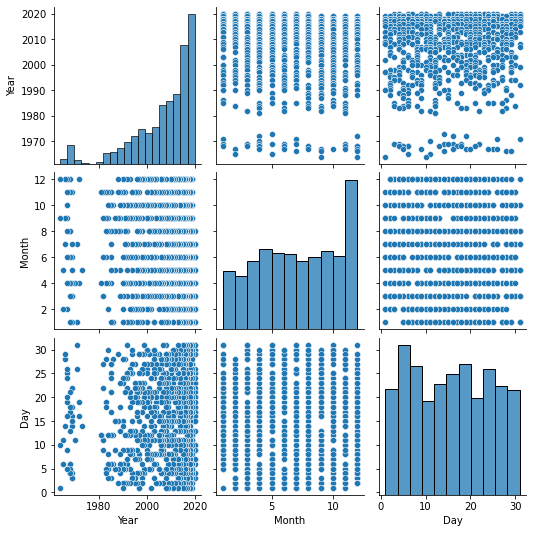

In [4]:
sns.pairplot(df)

# Observations

 - There is a sudden drop off of launches after the 1960-1970 boom. 
 - For what ever reason December has a lot more launches compared to the rest of the months.
 - Day over day we see that there is not really much change, So any rocket launched has the same chance day to day.
 - There seems to be an almost exponential increase, So we expect a launch to take place recently in December.



#  lineplot

This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations. 
>Uses Boxes to show different launch location

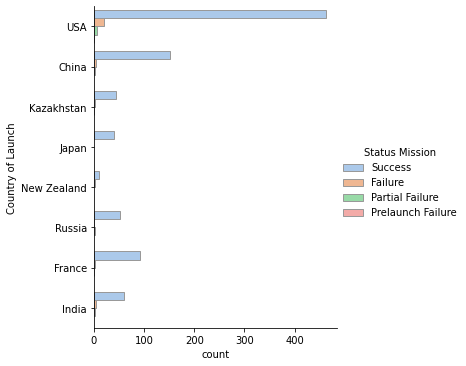

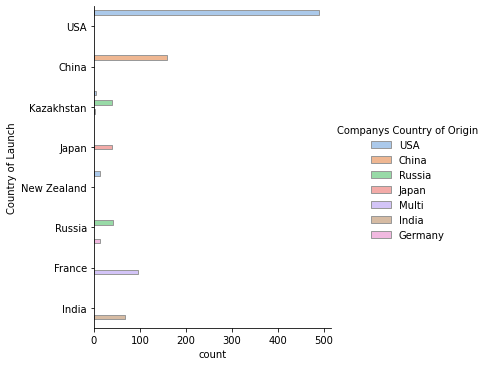

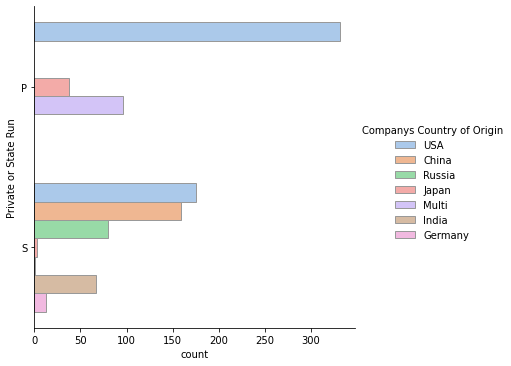

<Figure size 1440x1440 with 0 Axes>

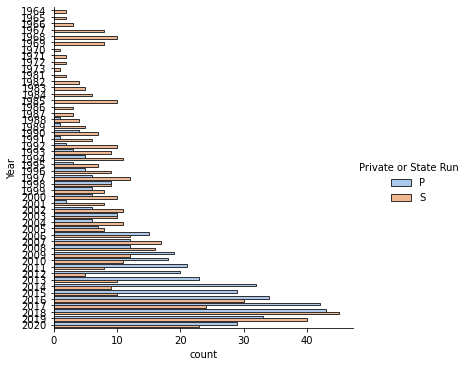

In [162]:

sns.catplot(y="Country of Launch", hue="Status Mission", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)
sns.catplot(y="Country of Launch", hue="Companys Country of Origin", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)
sns.catplot(y="Private or State Run", hue="Companys Country of Origin", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)
plt.figure(figsize=(20, 20))
sns.catplot(hue="Private or State Run", y="Year", kind="count",
            palette="pastel", edgecolor=".2",
            data=df)


# Observations

 - The USA has more launches but also the most failures per launch.
 - Russia has had relativly low launches compared to how many other countrys have had.
 - Japan has almost no failures for each of their launches.
 - Russia and Japan depend on other conuntrys for their launches.


#  Catplot

This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations. 
>Using long graph to show launches per year spread out by company.

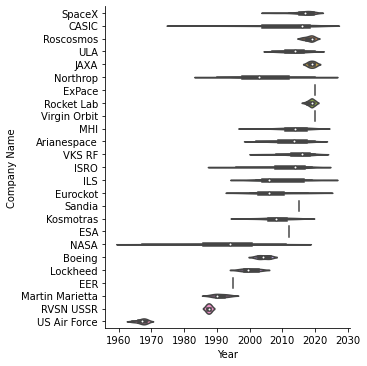

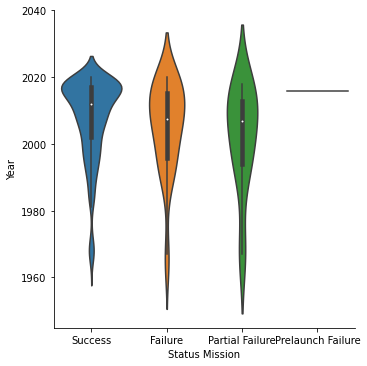

In [154]:
sns.catplot(x="Year",y="Company Name",kind="violin",  data=df)
sns.catplot(x="Status Mission",y="Year",kind="violin",  data=df)

# Observations

 - Nasa has Launched for the whole timeline
 - Some Companys have only had 1 major Launch in their life span.
 - Most long term Launches are from Countrys.
 - Many companys have lowered their launches from the mid 2000's

# **Research Question Analysis**
## Our question/s
Which countries are pushing for the privatization of space exploration and the impact of privatization on success rate and how many times per year a entity launches.

# Observations
 - Looking at the basic Launch data we can gather a lot about how Launches are conducted and who is the entity responsible for launching them. 
 - We know that a majority of the launches are from Country's, but by looking at our violin plot measuring year to Company we see that around 2010 is when Private entity's started their journey into space. 
 - Our Violin plot also shows that most Company's launch more than 1 rocket and most that have launched more than 1 still launch in 2020. This correlates with our failure Violin which shows that as time goes on there is more success , this is in part caused by Private Launches.
 - Our plotted data also shows that most Country's launch rockets from their own land, this also follows that most Private run launches are done on their home land. 
 - We also see that recently State run Launches are trying to keep up with Private ones, This is to say that with each increase in Private launches there is an increase in State Launches.
 - The last point of interest is that Private company's are much more likely to collaborate with other, while Country's, at least in the Launch phase, do not collaborate .
 